In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt

### Check runner 

In [2]:
import runner

In [3]:
newDict = runner.simulation()

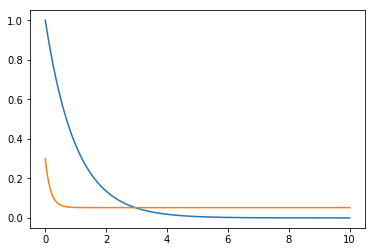

In [4]:
data = newDict['data']
plt.plot(data['t'],data['Nai'])
plt.plot(data['t'],data['Cai'])

### CHeck main IO routines 

In [5]:
import analyze

In [6]:
dataSub = analyze.GetData(data,"Nai")

In [7]:
result = analyze.ProcessDataArray(dataSub,"mean",[8,10],None,"Nai")

In [8]:
print(result)

0.000145949183576


### Check sampler 

In [9]:
import fittingAlgorithm
from fittingAlgorithm import outputObj
outputListDefault = { "Cai":outputObj("Cai","mean",[800,1000],
                       0.1),          # value you want 
                      "Nai":outputObj("Nai","val_vs_time",[  0, 200],
                      [1,0.5,0.15],timeInterpolations=[  0,100,200]) # check that interpolated values at 0, 100, 200 are 1, 0.5 ... 
                    }


In [10]:
fittingAlgorithm.validation()


Fixing random seed

timeRange:  [0.0, 3.0]
WHY is this wrapper needed
iter 1  out of 10
Inputs:  kon 5.0
Using 3 cores for 3 jobs
Should probably rescale sigma by the tolerated error vs current error and only for selected params 
Multi-threading
Worker bee 32716, Job 2 
Worker bee 32714, Job 0 
Worker bee 32715, Job 1 
result:  0.14305658358422738 truthValue:  0.1
result:  0.003020618802043093 truthValue:  0.1
result:  0.0008873264223266793 truthValue:  0.1
myDataFrame: 
           Container    jobID jobNum       kon   fitness
0_32714     0.143057  0_32714      0  0.227328  0.656175
1_32715   0.00302062  1_32715      1   20.9052  0.984781
2_32716  0.000887326  2_32716      2   71.7086  0.995553
jobFitnesses:  [ 0.65617516  0.9847811   0.99555348]
jobIndex:  0
bestVarDict:  {'kon': 0.22732770417919937}
currentFitness 0.656175156374
iter 1  out of 10

######

iter 2  out of 10
Inputs:  kon 0.227327704179
Using 3 cores for 3 jobs
Should probably rescale sigma by the tolerated error vs cu

In [11]:
## Spot check 

In [12]:
yamlFile = "inputParams.yaml"
varDict = fittingAlgorithm.YamlToParamDict(yamlFile)
varDict['kon'] = 5.0
varDict['koff'] = 1.0
print(varDict)
bestDict = runner.simulation(varDict=varDict)

{'kon': 5.0, 'koff': 1.0, 'bMax': 5.0, 'scale': 0.0001}


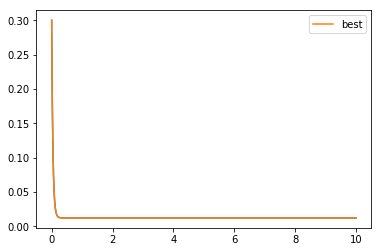

In [13]:
data = newDict['data']
#plt.plot(data['t'],data['Nai'])
plt.plot(data['t'],data['Cai'])
data = bestDict['data']
plt.plot(data['t'],data['Cai'],label="best")
plt.legend()